In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [3]:
fb=pd.read_csv(r"C:\Users\vaibh\Machine Learning\DataSets\FB.csv")
msft=pd.read_csv(r"C:\Users\vaibh\Machine Learning\DataSets\MSFT.csv")

In [4]:
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,05/18/2012,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,05/21/2012,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,05/22/2012,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,05/23/2012,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,05/24/2012,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [5]:
msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062378,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064606,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065720,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064049,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062935,47894400


In [6]:
print(type(fb))

<class 'pandas.core.frame.DataFrame'>


In [7]:
print(fb.index)
print(msft.index) 

RangeIndex(start=0, stop=1994, step=1)
RangeIndex(start=0, stop=8598, step=1)


In [8]:
print(fb.shape)
print(msft.shape)

(1994, 7)
(8598, 7)


In [9]:
print('FACEBOOK')
print(fb.tail(2))
print('\nMICRPOSOFT')
print(msft.tail(2))

FACEBOOK
            Date        Open        High         Low       Close   Adj Close  \
1992  04/21/2020  175.250000  175.380005  168.339996  170.800003  170.800003   
1993  04/22/2020  178.449997  184.779999  178.179993  184.139999  184.139999   

        Volume  
1992  24824100  
1993  24839032  

MICRPOSOFT
            Date        Open        High         Low       Close   Adj Close  \
8596  2020-04-21  173.500000  173.669998  166.110001  167.820007  167.820007   
8597  2020-04-22  171.389999  173.550003  170.830002  173.309998  173.309998   

        Volume  
8596  56131400  
8597  20782955  


In [10]:
print('FACEBOOK')
print(fb.describe())
print('\nMICRPOSOFT')
print(msft.describe())

FACEBOOK
              Open         High          Low        Close    Adj Close  \
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000   
mean    112.706790   113.937648   111.416595   112.734699   112.734699   
std      58.096208    58.603721    57.578470    58.150732    58.150732   
min      18.080000    18.270000    17.549999    17.730000    17.730000   
25%      64.954998    65.805002    64.050003    65.050001    65.050001   
50%     114.224998   115.154999   113.329998   114.329998   114.329998   
75%     168.295002   170.194996   166.557499   168.689999   168.689999   
max     222.570007   224.199997   221.279999   223.229996   223.229996   

             Volume  
count  1.994000e+03  
mean   3.294868e+07  
std    2.950711e+07  
min    5.913100e+06  
25%    1.617965e+07  
50%    2.401500e+07  
75%    3.963555e+07  
max    5.735764e+08  

MICRPOSOFT
              Open         High          Low        Close    Adj Close  \
count  8598.000000  8598.000000  8598.00

In [11]:
fb=fb.set_index("Date", drop = False)

msft["FinalDate"]=msft["Date"]+'/'+msft.Date.str.slice(0,4)
msft["FinalDate"]=msft.FinalDate.str.slice(5,)
msft["FinalDate"]=msft["FinalDate"].str.replace('-','/')
msft=msft.set_index("FinalDate",drop=False)
del msft['Date']
msft.rename(columns={'FinalDate': 'Date'}, inplace=True)
msft=msft.set_index("Date",drop=False)
print(msft)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
03/13/1986    0.088542    0.101563    0.088542    0.097222    0.062378   
03/14/1986    0.097222    0.102431    0.097222    0.100694    0.064606   
03/17/1986    0.100694    0.103299    0.100694    0.102431    0.065720   
03/18/1986    0.102431    0.103299    0.098958    0.099826    0.064049   
03/19/1986    0.099826    0.100694    0.097222    0.098090    0.062935   
...                ...         ...         ...         ...         ...   
04/16/2020  174.300003  177.279999  172.899994  177.039993  177.039993   
04/17/2020  179.500000  180.000000  175.869995  178.600006  178.600006   
04/20/2020  176.630005  178.750000  174.990005  175.059998  175.059998   
04/21/2020  173.500000  173.669998  166.110001  167.820007  167.820007   
04/22/2020  171.389999  173.550003  170.830002  173.309998  173.309998   

                Volume        Date  


In [12]:
print(fb.iloc[1000:,:])
print(msft.iloc[1000:,:])

                  Date        Open        High         Low       Close  \
Date                                                                     
05/11/2016  05/11/2016  120.410004  121.080002  119.419998  119.519997   
05/12/2016  05/12/2016  119.980003  120.839996  118.900002  120.279999   
05/13/2016  05/13/2016  120.379997  120.639999  119.680000  119.809998   
05/16/2016  05/16/2016  119.379997  119.610001  117.349998  118.669998   
05/17/2016  05/17/2016  118.820000  119.010002  117.199997  117.349998   
...                ...         ...         ...         ...         ...   
04/16/2020  04/16/2020  177.949997  178.050003  172.509995  176.250000   
04/17/2020  04/17/2020  179.199997  180.279999  176.660004  179.240005   
04/20/2020  04/20/2020  177.410004  180.500000  176.770004  178.240005   
04/21/2020  04/21/2020  175.250000  175.380005  168.339996  170.800003   
04/22/2020  04/22/2020  178.449997  184.779999  178.179993  184.139999   

             Adj Close    Volume  
Da

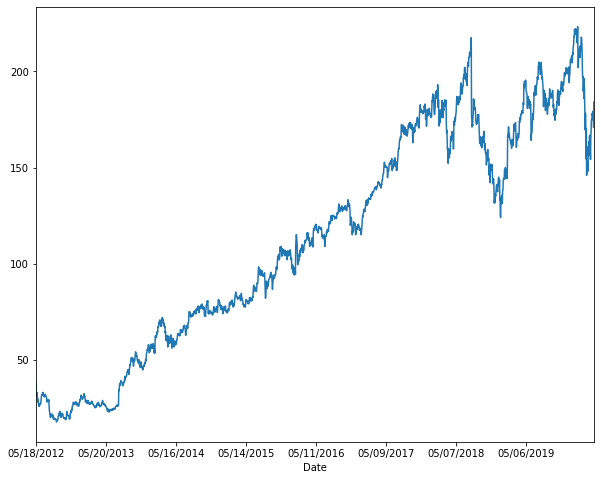

In [13]:
plt.figure(figsize=(10, 8))
fb['Close'].plot()
plt.show()

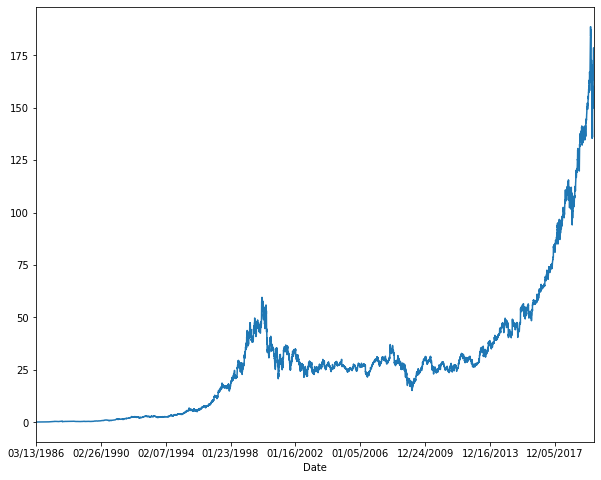

In [14]:
plt.figure(figsize=(10, 8))
msft['Close'].plot()
plt.show()

In [15]:
fb["ClosePriceTomorrow"]=fb["Close"].shift(-1) #Close Price of Tomorrow
msft["ClosePriceTomorrow"]=msft["Close"].shift(-1) 

fb["Price Difference"]=fb["ClosePriceTomorrow"]-fb["Close"]
msft["Price Difference"]=msft["ClosePriceTomorrow"]-msft["Close"]

#Daily Return=Price Diff/Close Price
fb["Daily Return"]=fb["Price Difference"]/fb["Close"]
msft["Daily Return"]=msft["Price Difference"]/msft["Close"]

# conditions for stocks going for long or short in certain day
condition1=[
    (fb["Price Difference"]>0),
    (fb["Price Difference"]<0)
]
condition2=[
    (msft["Price Difference"]>0),
    (msft["Price Difference"]<0)
]
choices=['1','-1']
fb["Direction"]=np.select(condition1,choices)
msft["Direction"]=np.select(condition2,choices)

#Moving Average over  3 days in a weeek
fb["Moving Average3"]=(fb["Close"]+fb["Close"].shift(1)+fb["Close"].shift(2))/3
msft["Moving Average3"]=(msft["Close"]+msft["Close"].shift(1)+msft["Close"].shift(2))/3

fb["MA40"]=fb["Close"].rolling(40).mean()
fb["MA200"]=fb["Close"].rolling(200).mean()

msft["MA40"]=msft["Close"].rolling(40).mean()
msft["MA200"]=fb["Close"].rolling(200).mean()


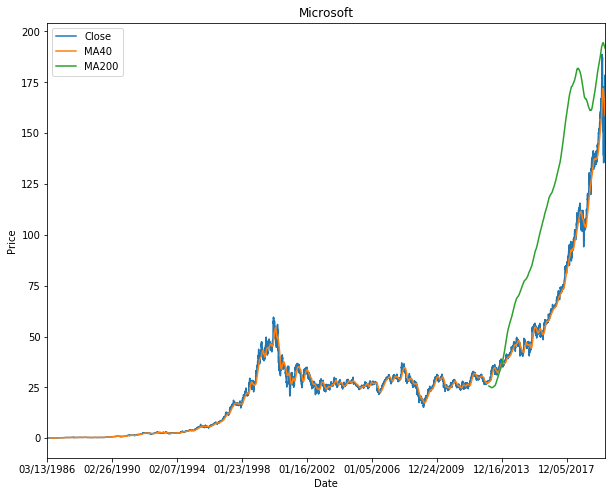

In [16]:
plt.figure(figsize=(10, 8))
plt.title("Microsoft")
plt.ylabel("Price")
msft['Close'].plot()
msft['MA40'].plot() #IF MA40>MA200 , then the stock will go upwards for small amount of time
msft['MA200'].plot()
plt.legend()
plt.show()

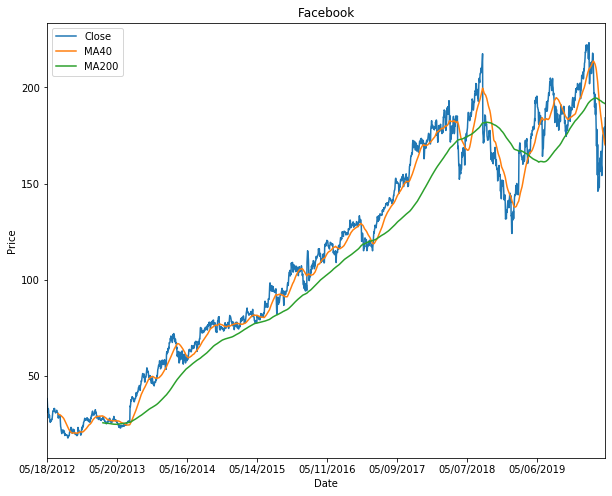

In [17]:
plt.figure(figsize=(10, 8))
plt.title("Facebook")
plt.ylabel("Price")
fb['Close'].plot()
fb['MA40'].plot() #IF MA40>MA200 , then the stock will go upwards for small amount of time
fb['MA200'].plot() #fb['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
#fb['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

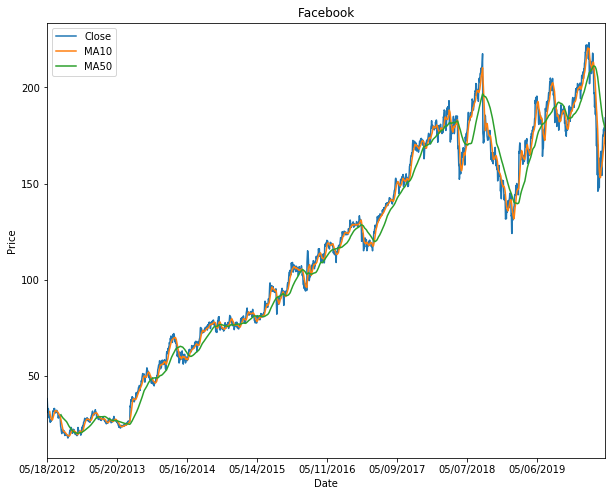

In [18]:
fb["MA10"]=fb["Close"].rolling(10).mean()
fb["MA50"]=fb["Close"].rolling(50).mean()
plt.figure(figsize=(10, 8))
plt.title("Facebook")
plt.ylabel("Price")
fb['Close'].plot() #MA10:Fast Signal AND MA50:Slow Signal
fb['MA10'].plot() #IF MA10>MA50 , then the stock will go upwards for small amount of time
fb['MA50'].plot() #fb['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
#fb['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

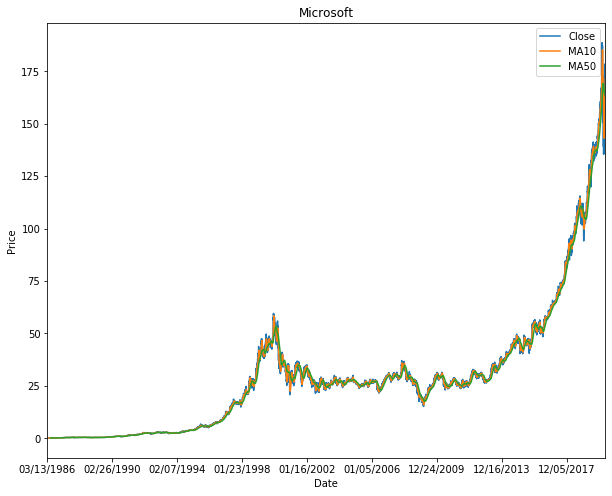

In [19]:
msft["MA10"]=msft["Close"].rolling(10).mean()
msft["MA50"]=msft["Close"].rolling(50).mean()
plt.figure(figsize=(10, 8))
plt.title("Microsoft")
plt.ylabel("Price")
msft['Close'].plot()
msft['MA10'].plot() #IF MA10>MA50 , then the stock will go upwards for small amount of time
msft['MA50'].plot() #fb['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
#fb['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

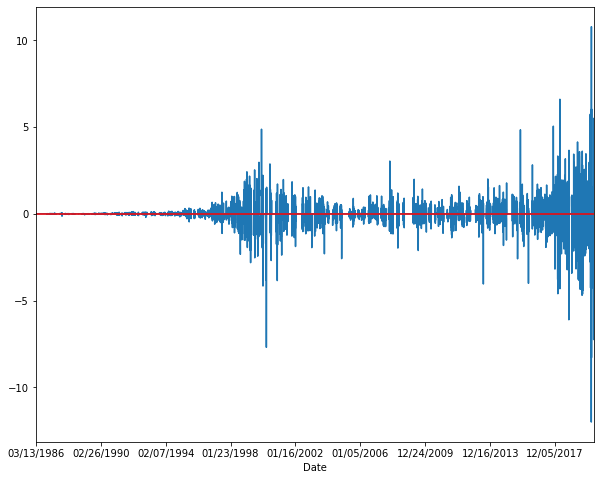

In [20]:
condition1=[
    (msft["MA10"]>msft["MA50"]),
    (msft["MA10"]<msft["MA50"])
]
choices=[1,0]
msft["Shares"]=np.select(condition1,choices)

msft["Profit"]=[msft.loc[ei,"ClosePriceTomorrow"]-msft.loc[ei,"Close"]
               if msft.loc[ei,"Shares"]==1
               else 0 
               for ei in msft.index]

plt.figure(figsize=(10, 8))
msft["Profit"].plot()
plt.axhline(y=0,color="red")

In [21]:
msft["Wealth"]=msft["Profit"].cumsum()
msft.tail()

,Open,High,Low,Close,Adj Close,Volume,Date,ClosePriceTomorrow,Price Difference,Daily Return,Direction,Moving Average3,MA40,MA200,MA10,MA50,Shares,Profit,Wealth
Date,,,,,,,,,,,,,,,,,,,
04/16/2020,174.300003,177.279999,172.899994,177.039993,177.039993,50479600,04/16/2020,178.600006,1.560013,0.008812,1,174.206665,158.92200,191.8425,165.625000,164.1144,1,1.560013,100.281743
04/17/2020,179.500000,180.000000,175.869995,178.600006,178.600006,52765600,04/17/2020,175.059998,-3.540008,-0.019821,-1,175.840001,158.77650,191.7637,167.959001,164.0884,1,-3.540008,96.741735
04/20/2020,176.630005,178.750000,174.990005,175.059998,175.059998,36669600,04/20/2020,167.820007,-7.239991,-0.041357,-1,176.899999,158.68825,191.6689,170.082001,163.9170,1,-7.239991,89.501744
04/21/2020,173.500000,173.669998,166.110001,167.820007,167.820007,56131400,04/21/2020,173.309998,5.489991,0.032714,1,173.826670,158.61150,191.5409,170.337001,163.5956,1,5.489991,94.991735
04/22/2020,171.389999,173.550003,170.830002,173.309998,173.309998,20782955,04/22/2020,NaN,NaN,NaN,0,172.063334,158.74250,191.4828,171.319000,163.2878,1,NaN,NaN


94.99173499999999
0.097222


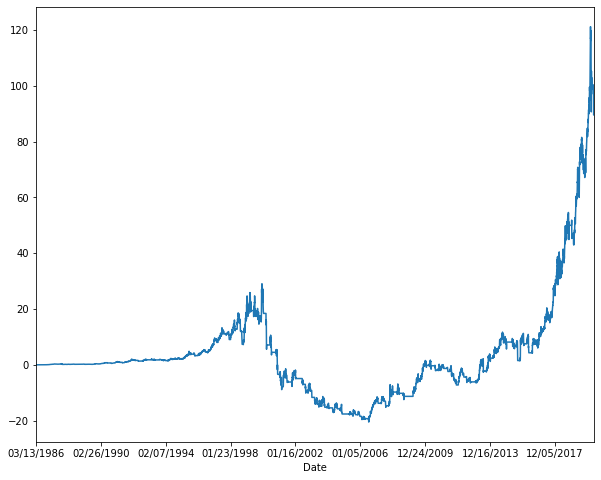

In [22]:
print(msft.loc[msft.index[-2],"Wealth"])
print(msft.loc[msft.index[0],"Close"])
plt.figure(figsize=(10, 8))
msft["Wealth"].plot()

<b><h1>Conclusion till now:</h1></b>   
<h2>Method we used to predict , if the stock will go up or down can't be determined by this method.As , it has fluctuations all over the graph. 

In [23]:
msft[["Close","Low"]]

,Close,Low
Date,,
03/13/1986,0.097222,0.088542
03/14/1986,0.100694,0.097222
03/17/1986,0.102431,0.100694
03/18/1986,0.099826,0.098958
03/19/1986,0.098090,0.097222
...,...,...
04/16/2020,177.039993,172.899994
04/17/2020,178.600006,175.869995
04/20/2020,175.059998,174.990005


<h1>Models of Stock Return<h1>

In [24]:
msft['LogReturn']=np.log(msft['Close']).shift(-1) - np.log(msft['Close'])

In [25]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume,Date,ClosePriceTomorrow,Price Difference,Daily Return,Direction,Moving Average3,MA40,MA200,MA10,MA50,Shares,Profit,Wealth,LogReturn
Date,,,,,,,,,,,,,,,,,,,,
03/13/1986,0.088542,0.101563,0.088542,0.097222,0.062378,1031788800,03/13/1986,0.100694,0.003472,0.035712,1,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.035089
03/14/1986,0.097222,0.102431,0.097222,0.100694,0.064606,308160000,03/14/1986,0.102431,0.001737,0.017250,1,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.017103
03/17/1986,0.100694,0.103299,0.100694,0.102431,0.065720,133171200,03/17/1986,0.099826,-0.002605,-0.025432,-1,0.100116,NaN,NaN,NaN,NaN,0,0.0,0.0,-0.025761
03/18/1986,0.102431,0.103299,0.098958,0.099826,0.064049,67766400,03/18/1986,0.098090,-0.001736,-0.017390,-1,0.100984,NaN,NaN,NaN,NaN,0,0.0,0.0,-0.017543
03/19/1986,0.099826,0.100694,0.097222,0.098090,0.062935,47894400,03/19/1986,0.095486,-0.002604,-0.026547,-1,0.100116,NaN,NaN,NaN,NaN,0,0.0,0.0,-0.026906


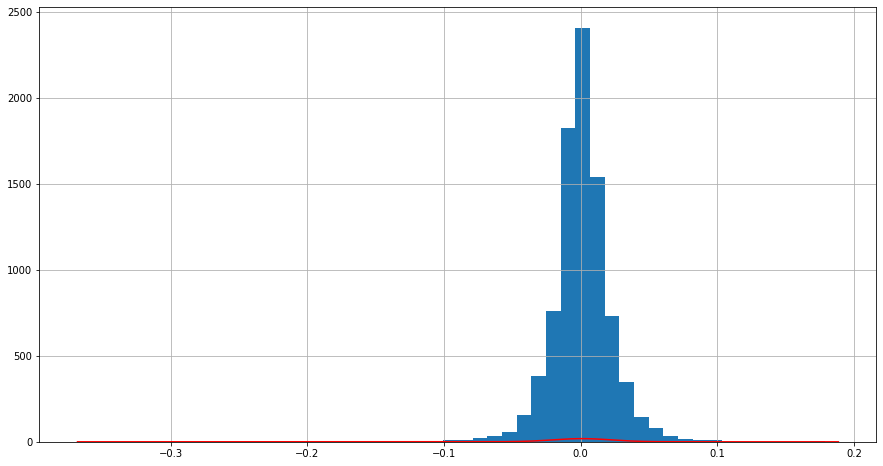

In [26]:
mu=msft['LogReturn'].mean()
sigma=msft['LogReturn'].std(ddof=1)

density=pd.DataFrame()
density['x']=np.arange(msft['LogReturn'].min() -0.01 ,msft['LogReturn'].max() +0.01,0.001)
density['pdf']= norm.pdf(density['x'],mu,sigma)

msft['LogReturn'].hist(bins=50,figsize=(15,8))
plt.plot(density['x'],density['pdf'],color='red')
plt.show()

In [27]:
# probability that the stock price of microsoft will drop over 5% in a day
prob_return1=norm.cdf(-0.05,mu,sigma)
prob_return1

0.009381293654111205

In [28]:
# probability that the stock price of microsoft will drop over 10% in a day
prob_return1=norm.cdf(-0.10,mu,sigma)
prob_return1

1.5795045768211774e-06

In [29]:
# drop over 40% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print(norm.cdf(-0.4,mu220,sigma220))

0.0326938731860244


In [30]:
# drop over 20% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print(norm.cdf(-0.2,mu220,sigma220))

0.11130051704133054


<h1>VaR Value at Risk

In [31]:
#Single Day
VaR=norm.pdf(0.05,mu,sigma)
print(VaR)

1.4023298714333228


In [33]:
print(norm.ppf(0.05, mu, sigma)) #5 Percentile
print(norm.ppf(0.95, mu, sigma)) #95 Percentile

-0.034732354264604214
0.03647385482121673
